### Imports libraries

In [1]:
# Initial imports
import numpy as np
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Rename and checking the head, info and shape
data.rename(index=str,columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

In [4]:
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [6]:
data.shape

(200, 5)

In [7]:
# Checking null values
data.isnull().sum() # No missing value

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [8]:
# Droping the CustomerID column
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


### Questions

In [10]:
# Who has the highest Spending Score?
score = data.groupby('Gender')['Score'].mean() # In this data women have highest Spending Scores
score

Gender
Female    51.526786
Male      48.511364
Name: Score, dtype: float64

In [11]:
# Who has the highest Annual Income?
income = data.groupby('Gender')['Income'].mean() # In this data men have highest Annual Income
income

Gender
Female    59.250000
Male      62.227273
Name: Income, dtype: float64

### Exploratory Data Analysis

In [12]:
# More imports and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected = True)

%matplotlib inline

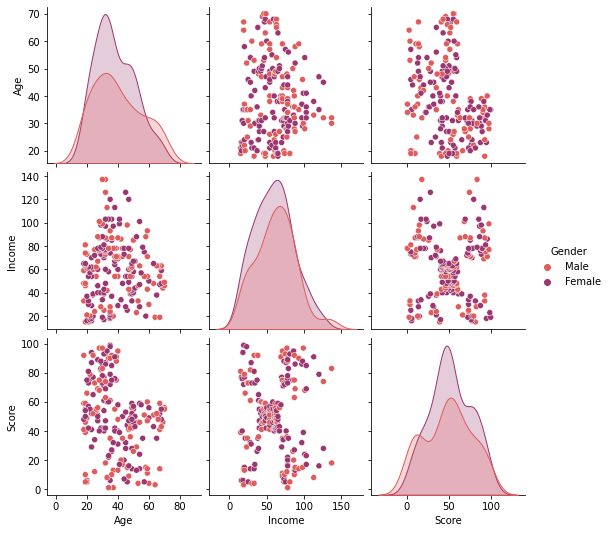

In [13]:
sns.pairplot(data,hue='Gender',palette='flare')

<AxesSubplot:title={'center':'Distribution by Gender'}, xlabel='Gender', ylabel='count'>

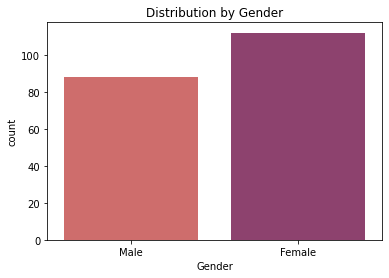

In [14]:
plt.title('Distribution by Gender')
sns.countplot(x='Gender',palette='flare',data=data) # There is more women than men

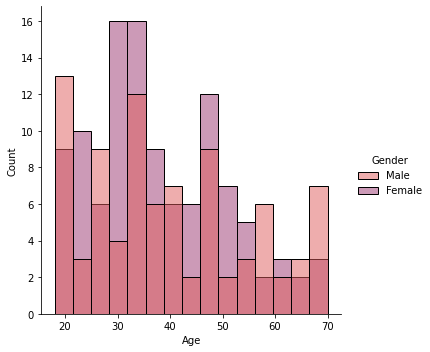

In [15]:
sns.displot(x='Age',hue='Gender',palette='flare',bins=15,data=data) # It's around 30 and 40 years

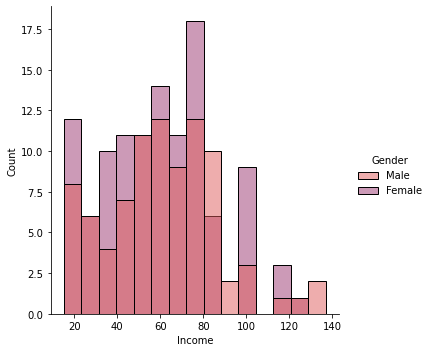

In [16]:
sns.displot(x='Income',hue='Gender',palette='flare',bins=15,data=data) # It's around $60k

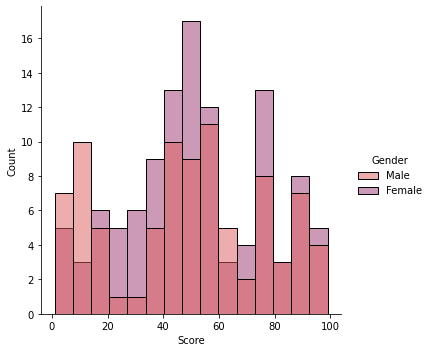

In [17]:
sns.displot(x='Score',hue='Gender',palette='flare',bins=15,data=data) # It's around 40 to 60 mostly women

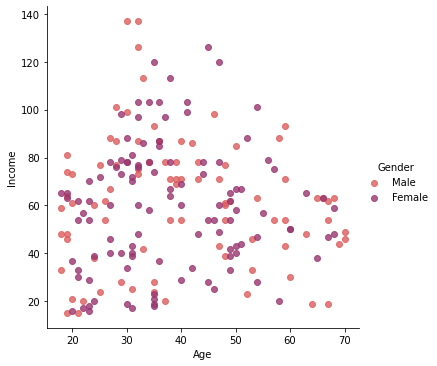

In [18]:
sns.lmplot(x='Age',y='Income',hue='Gender',fit_reg=False,palette='flare',data=data)
# Apparently, older people have a lower income

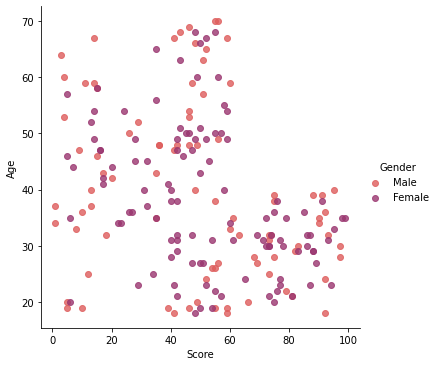

In [19]:
sns.lmplot(x='Score',y='Age',hue='Gender',fit_reg=False,palette='flare',data=data)
# There is a inverse trend between Age by Score, and we can see some pattern

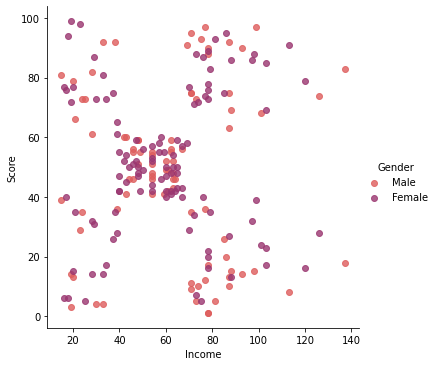

In [20]:
sns.lmplot(x='Income',y='Score',hue='Gender',fit_reg=False,palette='flare',data=data)
# Clearly we were able to identify several spending profiles

### Clustering with K-Means

In [21]:
# Importing the model
from sklearn.cluster import KMeans

### 2D Segmentation

In [22]:
X = data[['Age', 'Income' , 'Score']].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001, random_state=42, algorithm='full') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

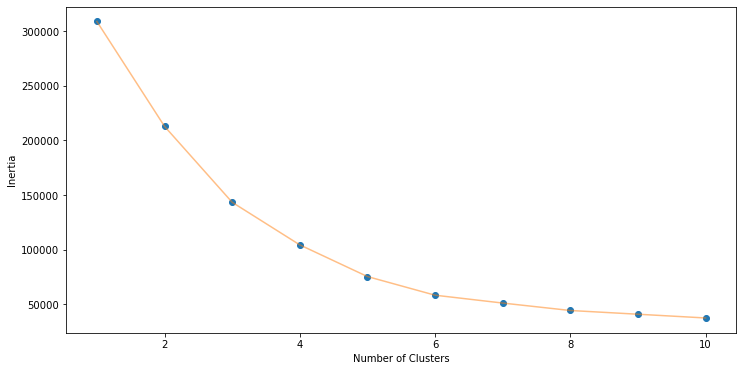

In [23]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')

In [24]:
# 8 is a good K-value for this dataset
algorithm = (KMeans(n_clusters = 8 ,init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state=42 , algorithm='elkan'))
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [25]:
# Creating the Clusters column
data['Clusters'] = labels1
data.head()

,Gender,Age,Income,Score,Clusters
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


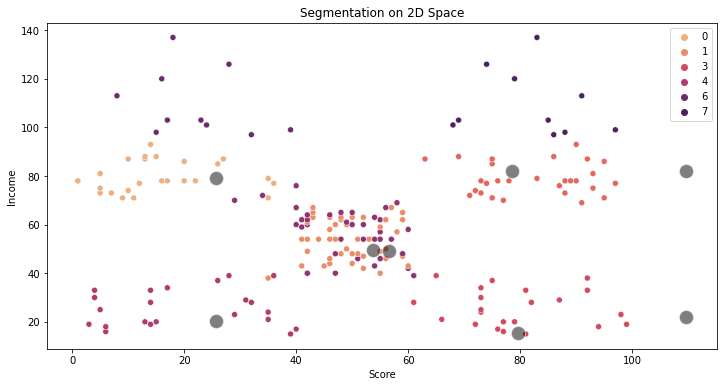

In [26]:
plt.figure(figsize=(12,6))
plt.title('Segmentation on 2D Space')

sns.scatterplot(data=data, x='Score', y='Income', hue='Clusters', palette='flare');
sns.scatterplot(x=centroids1[:, 1], y=centroids1[:, 2], color='black', s=200, alpha=0.5);

In [ ]:
# The 2D space is not enough for explain this customers segmentation, let's explore a 3D space

### 3D segmentation

In [27]:
algorithm = (KMeans(n_clusters= 8 ,init='k-means++', n_init= 10 , max_iter=300, 
                        tol=0.0001,  random_state=42, algorithm='elkan'))
algorithm.fit(X)

KMeans(algorithm='elkan', random_state=42)

In [28]:
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Score'],
    z= data['Income'],
    mode='markers',
     marker=dict(
        color = data['Clusters'], 
        size= 10,
        line=dict(
            color= data['Clusters'],
            width= 12
        ),
        opacity=0.8
     )
)
data= [trace1]
layout= go.Layout(
    title= '3D Clusters',
    scene= dict(
            xaxis = dict(title='Age'),
            yaxis = dict(title='Spending Score'),
            zaxis = dict(title='Annual Income')
        )
)
fig= go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

### Conclusion

In [ ]:
# 3D segmentation plot does a good job in distincting our clusters.

# By looking, we can see the following insights about clusters:

# Cluster 0 - Low Spending Score, Upper-middle Income, Middle Age

# Cluster 1 - Middle Spending Score, Middle Income, Old Age

# Cluster 2 - High Spending Score, Upper-middle income, Middle Age

# Cluster 3 - High Spending Score, Low Income, Young Age

# Cluster 4 - Low Spending Score, Low Income, All Age

# Cluster 5 - Middle Spending Score, Middle Income, Young Age

# Cluster 6 - Low Spending Score, High Income, Middle Age

# Cluster 7 - High Spending Score, High Income, Middle Age